## Notes on numpy

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
np.__version__

'1.18.1'

In [61]:
A = np.arange(6).reshape(3, 2)

x = np.array([2, 4]).reshape(2, 1)

In [63]:
x

array([[2],
       [4]])

In [65]:
A@x

array([[ 4],
       [16],
       [28]])

In [66]:
A.dot(x)

array([[ 4],
       [16],
       [28]])

In [37]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [33]:
x.size

10

## Rotating a matrix

In [14]:
def rotate(deg, vector):
    """ Rotate vector by a specific amount of degrees
        in the anti-clockwise direction. """
    theta = np.radians(deg)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    
    return R.dot(vector)
    

array([-1.,  1.])

In [11]:
R.dot(np.array([1, 2]))

array([-0.1339746 ,  2.23205081])

In [186]:
df = {'a':1, 'b':2, 'c':3}

In [195]:
def plotVect(dict_vect, xbounds, ybounds, startx=0, starty=0, 
             title='Vectors', size=(5, 5)):
    """ 
    Plot a vector using matplotlib

    dict_vect (dictionary): {description (string), vector (np.array)}
    xbounds (tuple): lower and upper bound for x axis
    ybounds (tuple): lower and upper bound for y axis
    startx, starty (int): base of vectors to draw from
    title (string): Title of the plot
    size (tuple): width, height of plot. 
    """
    ax = plt.axes()
    plt.rcParams["figure.figsize"] = size
    
    colors = ['red', 'blue', 'green', 'yellow', 'orange']
    
    ax.axhline(y=0, color='black', zorder=1)
    ax.axvline(x=0, color='black')
    
    i = 0
    for descr, vect in dict_vect.items():
        x, y = vect[0], vect[1]

        ax.arrow(startx, starty, 
                 x, y, 
                 head_width=0.2, 
                 head_length=0.2, 
                 facecolor=colors[i], 
                 edgecolor=colors[i],
                 length_includes_head=True,
                 zorder = 10+i,
                 width=.05)
        
        plt.annotate(descr, xy=(x+.2, y+.2))
        i += 1

    
    
    plt.title(title)
    plt.grid()
    
    plt.xlim(xbounds[0], xbounds[1])
    plt.ylim(ybounds[0], ybounds[1])
    
    plt.gca().set_aspect('equal', adjustable='box')  # Equal scales on axes
    
    return ax

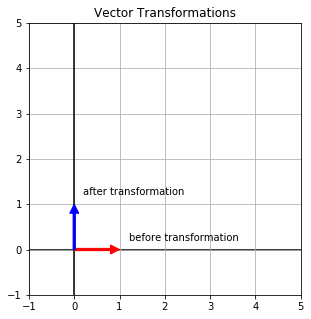

In [197]:
before = np.array([1, 0])
after = rotate(90, before)

plotVect({'before transformation':before,
          'after transformation':after},
         xbounds=(-1, 5),
         ybounds=(-1, 5),
         title='Vector Transformations');